# PROJECT: CAR PRICE PREDICTION

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [67]:
car = pd.read_csv('car_de.csv')

In [68]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [69]:
car.shape

(4340, 8)

In [70]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [71]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [72]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [73]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

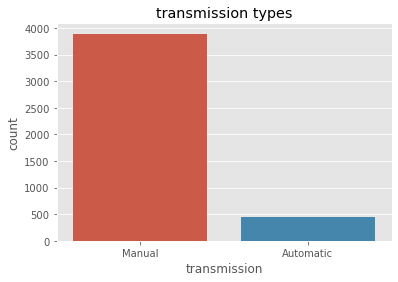

In [74]:
sns.countplot(x='transmission',data=car)
plt.title('transmission types')
plt.show()

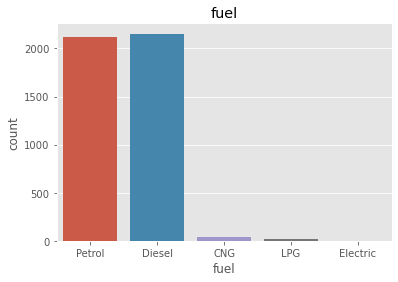

In [75]:
sns.countplot(x='fuel',data = car)
plt.title('fuel')
plt.show()

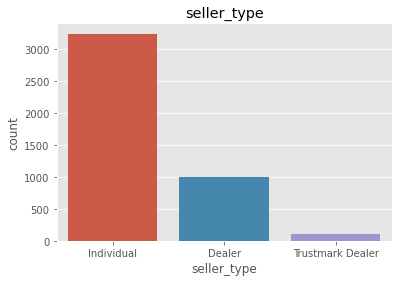

In [76]:
sns.countplot(x='seller_type',data = car)
plt.title('seller_type')
plt.show()

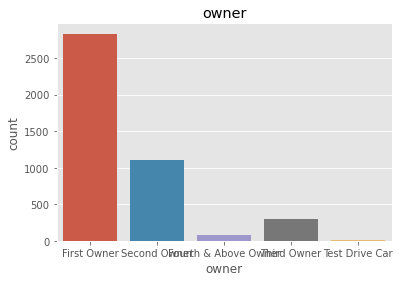

In [77]:
sns.countplot(x='owner',data = car)
plt.title('owner')
plt.show()

In [78]:
print(car['fuel'].unique())
print(car['seller_type'].unique())
print(car['transmission'].unique())
print(car['owner'].unique()) 

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [79]:
print (car.fuel.value_counts())
print(car.seller_type.value_counts())
print(car.transmission.value_counts())
print(car.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [80]:
f_type = car['fuel']
s_type = car['seller_type']
t_type = car['transmission']
o_type = car['owner']
sell_price = car['selling_price']

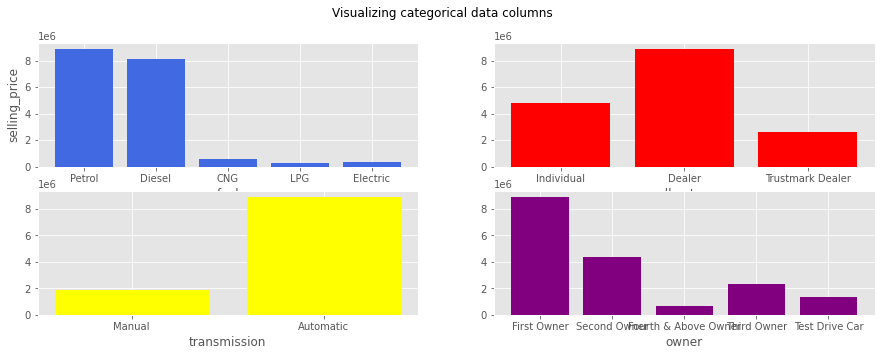

In [81]:
from matplotlib import style
style.use("ggplot")
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(2,2,1)
plt.bar(f_type,sell_price,color='royalblue')
plt.xlabel('fuel')
plt.ylabel('selling_price')
plt.subplot(2,2,2)
plt.bar(s_type,sell_price,color='red')
plt.xlabel('seller_type')
plt.subplot(2,2,3)
plt.bar(t_type,sell_price,color='yellow')
plt.xlabel('transmission')
plt.subplot(2,2,4)
plt.bar(o_type,sell_price,color='purple')
plt.xlabel('owner')
plt.show()

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

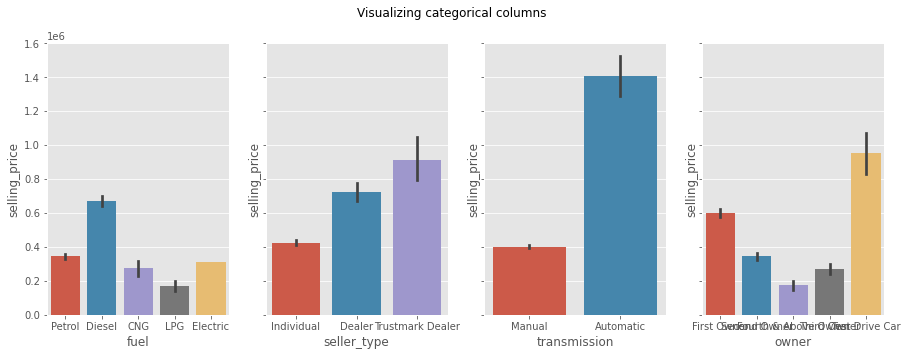

In [82]:
fig,axes = plt.subplots(1,4,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=f_type,y=sell_price,ax=axes[0])
sns.barplot(x=s_type,y=sell_price,ax=axes[1])
sns.barplot(x=t_type,y=sell_price,ax=axes[2])
sns.barplot(x=o_type,y=sell_price,ax=axes[3])


In [83]:
petrol_data = car.groupby('fuel').get_group('Petrol')
petrol_data.describe()

,year,selling_price,km_driven
count,2123.000000,2.123000e+03,2123.000000
mean,2012.595855,3.448401e+05,52340.079604
std,4.847011,3.636728e+05,38109.196219
min,1992.000000,2.000000e+04,101.000000
25%,2009.000000,1.500000e+05,25000.000000
50%,2014.000000,2.690000e+05,50000.000000
75%,2017.000000,4.500000e+05,70000.000000
max,2020.000000,8.900000e+06,806599.000000


In [85]:
seller_data = car.groupby('seller_type').get_group('Dealer')
seller_data.describe()

,year,selling_price,km_driven
count,994.000000,9.940000e+02,994.000000
mean,2014.200201,7.218229e+05,52827.259557
std,3.332098,8.599559e+05,47552.761406
min,1998.000000,2.200000e+04,101.000000
25%,2012.000000,3.100000e+05,27337.500000
50%,2015.000000,4.950000e+05,49000.000000
75%,2017.000000,7.500000e+05,66000.000000
max,2020.000000,8.900000e+06,806599.000000


Text(0.5, 0.98, 'Visualizing Numerical data of year')

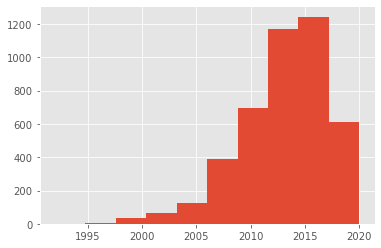

In [86]:
car['year'].hist()
fig.suptitle('Visualizing Numerical data of year')

Text(0.5, 0.98, 'Visualizing Numerical data of km_driven')

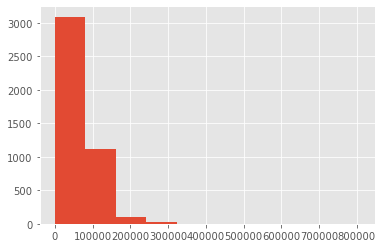

In [87]:
car['km_driven'].hist()
fig.suptitle('Visualizing Numerical data of km_driven')

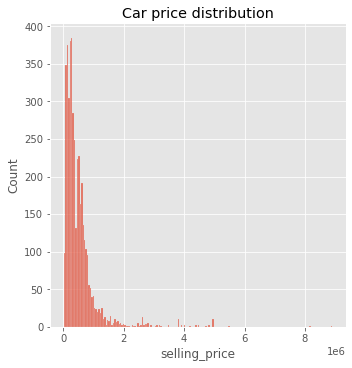

In [88]:
sns.displot(car.selling_price)
plt.title('Car price distribution')
plt.show()

In [90]:
car.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
car.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [91]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [92]:
new_car = car.drop('name',axis=1)
new_car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,0,1


In [93]:
car.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
year,1.000000,0.413922,-0.419688,0.090388,0.182458,0.143800,-0.410448
selling_price,0.413922,1.000000,-0.192289,0.226883,0.240666,0.530205,-0.198833
km_driven,-0.419688,-0.192289,1.000000,0.274760,-0.187131,-0.120226,0.274409
fuel,0.090388,0.226883,0.274760,1.000000,0.011358,0.027507,0.015318
seller_type,0.182458,0.240666,-0.187131,0.011358,1.000000,0.200191,-0.211115
transmission,0.143800,0.530205,-0.120226,0.027507,0.200191,1.000000,-0.083924
owner,-0.410448,-0.198833,0.274409,0.015318,-0.211115,-0.083924,1.000000


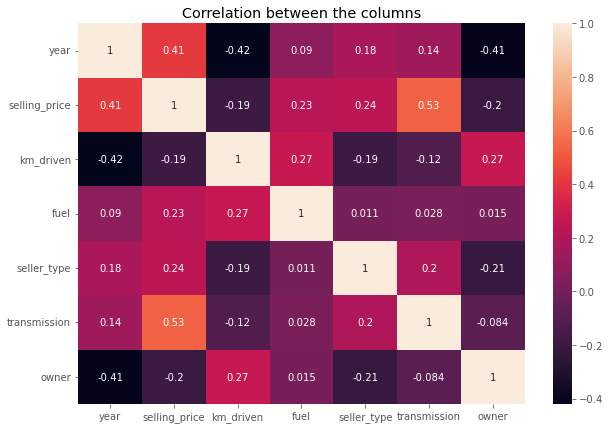

In [94]:
plt.figure(figsize=(10,7))
sns.heatmap(car.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [95]:
car.corr()['selling_price'].sort_values()

owner           -0.198833
km_driven       -0.192289
fuel             0.226883
seller_type      0.240666
year             0.413922
transmission     0.530205
selling_price    1.000000
Name: selling_price, dtype: float64

<AxesSubplot:title={'center':'Correlation between Transmission and selling price'}, xlabel='transmission', ylabel='selling_price'>

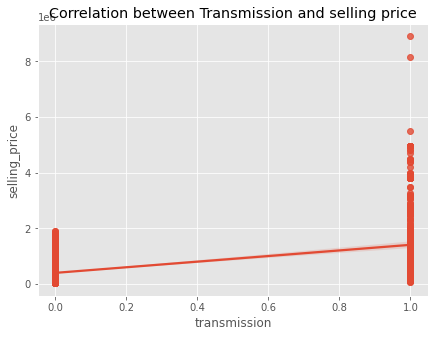

In [96]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between Transmission and selling price')
sns.regplot(x='transmission', y='selling_price',data = car)

In [97]:
X = car.drop(['name','selling_price'],axis=1)

In [98]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1


In [99]:
Y = car['selling_price']

In [105]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [106]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [107]:
print(model.feature_importances_)

[0.23831344 0.24212851 0.14369034 0.05357098 0.29282828 0.02946845]


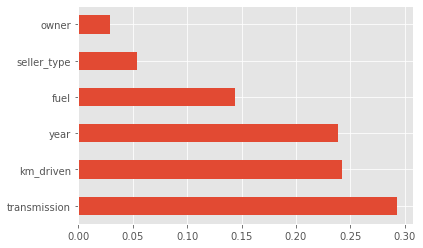

In [108]:
f_imp = pd.Series(model.feature_importances_,index=X.columns)
f_imp.nlargest(6).plot(kind="barh")
plt.show()

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

In [111]:
X_train.shape

(3038, 6)

In [112]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model

LinearRegression()

In [113]:
LR_model.fit(X_train,Y_train)
train_predict = LR_model.predict(X_test)
LR_model.score(X_test,Y_test)

0.4713390351886021

In [114]:
train_predict = LR_model.predict(X_train)

In [115]:
R2_score = metrics.r2_score(Y_train, train_predict)

In [116]:
R2_score

0.4297830710363876

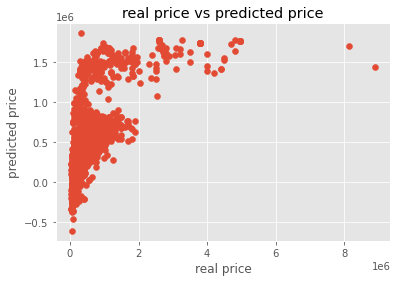

In [117]:
plt.scatter(Y_train, train_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [118]:
test_predict = LR_model.predict(X_test)

In [119]:
R2_score = metrics.r2_score(Y_test, test_predict)

In [120]:
R2_score

0.4713390351886021

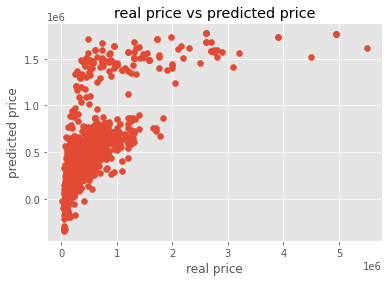

In [121]:
plt.scatter(Y_test, test_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [122]:
from sklearn.linear_model import Lasso

In [123]:
La_model = Lasso()
La_model.fit(X_train,Y_train)
La_model.score(X_test,Y_test)


0.4713401812614868

In [124]:
train_predict = La_model.predict(X_train)
R2 = metrics.r2_score(Y_train, train_predict)

In [125]:
R2_score

0.4713390351886021

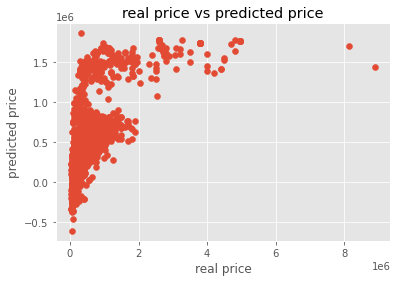

In [126]:
plt.scatter(Y_train, train_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [127]:
test_predict = La_model.predict(X_test)

In [128]:
R2_score = metrics.r2_score(Y_test, test_predict)

In [129]:
R2_score

0.4713401812614868

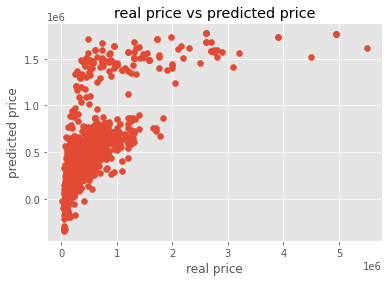

In [130]:
plt.scatter(Y_test, test_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [131]:
 from sklearn.neighbors import KNeighborsRegressor

In [132]:
knn = KNeighborsRegressor(n_neighbors = 5)

In [133]:
knn

KNeighborsRegressor()

In [134]:
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.3937920482901991

In [135]:
train_predict = knn.predict(X_train)

In [136]:
R2_score = metrics.r2_score(Y_train, train_predict)

In [137]:
R2_score

0.6010273761150412

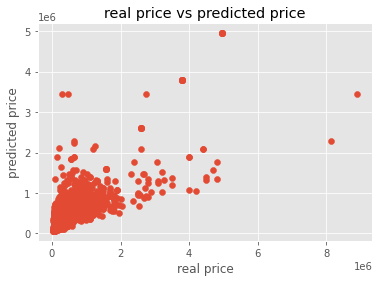

In [138]:
plt.scatter(Y_train, train_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [139]:
test_predict =knn.predict(X_test)

In [140]:
R2_score = metrics.r2_score(Y_test, test_predict)

In [141]:
R2_score

0.3937920482901991

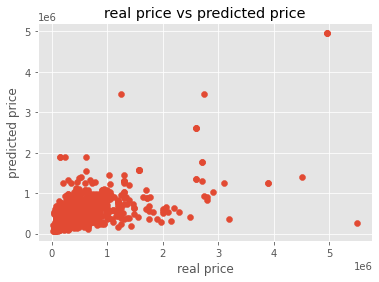

In [142]:
plt.scatter(Y_test, test_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [143]:
from sklearn.tree import DecisionTreeRegressor

In [144]:
D_model = DecisionTreeRegressor()
D_model.fit(X_train, Y_train)
D_model.score(X_test, Y_test)

0.6411068511826644

In [145]:
train_predict = D_model.predict(X_train)
R2_score = metrics.r2_score(Y_train, train_predict)
R2_score

0.9642791205011825

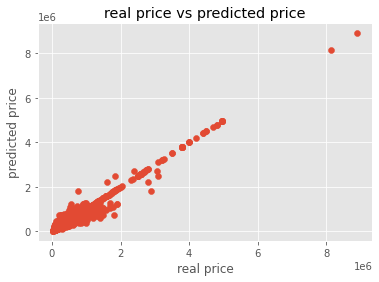

In [146]:
plt.scatter(Y_train, train_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [147]:
test_predict =D_model.predict(X_test)
R2_score = metrics.r2_score(Y_test, test_predict)
R2_score

0.6411068511826644

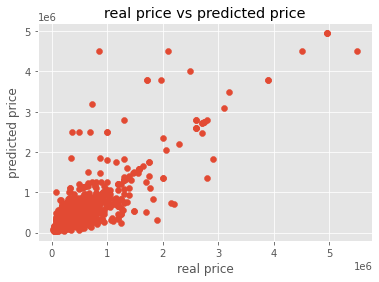

In [148]:
plt.scatter(Y_test, test_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [149]:
from sklearn.ensemble import RandomForestRegressor
ran_model = RandomForestRegressor()
ran_model.fit(X_train,Y_train)
ran_model.score(X_test,Y_test)

0.6841311350759507

In [150]:
train_predict = ran_model.predict(X_train)
R2_score = metrics.r2_score(Y_train, train_predict)
R2_score

0.9116698319579698

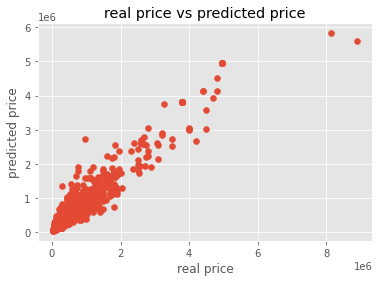

In [151]:
plt.scatter(Y_train, train_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()

In [152]:
test_predict =ran_model.predict(X_test)
R2_score = metrics.r2_score(Y_test, test_predict)
R2_score

0.6841311350759507

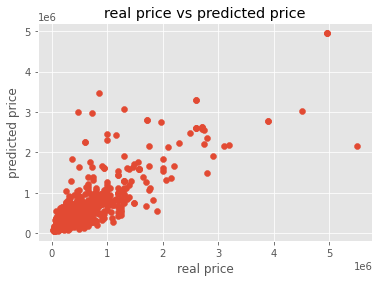

In [153]:
plt.scatter(Y_test, test_predict)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.title('real price vs predicted price')
plt.show()